# Project: Wrangling and Analyze Data

In [7]:
import pandas as pd
import requests 
import numpy as np 
import matplotlib.pyplot as plt 
import tweepy
import json
import tqdm
import re 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [8]:
df = pd.read_csv('./twitter_archive_enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', 'w') as f:
    f.write(response.content.decode("utf-8"))

In [10]:
image_prediction_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_id = df.tweet_id.values

with open('tweet-json.txt', 'w') as f:
    for id in tqdm.tqdm(tweet_id):
        try:
            data = api.get_status(id, tweet_mode='extended')
            data = json.dumps(data._json)
            f.write(data + '\n')
        except:
            pass


  0%|          | 0/2356 [00:00<?, ?it/s]

Rate limit reached. Sleeping for: 205


 38%|███▊      | 900/2356 [07:03<05:55,  4.10it/s]   

Rate limit reached. Sleeping for: 687


In [13]:
tweet_df = pd.read_json('tweet-json.txt', orient='records', lines=True)
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [16]:
image_prediction_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [17]:
df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

### Quality issues
1. There are 181 tweets are the retweet (the record has retweeted_status data)

2. 2 columns `in_reply_to_status_id` and `in_reply_to_user_id` have so many null values

3. The `tweet_id` column should be string datatype, `timestamp` column should be date time datatype, column `id` should be `tweet_id` in `tweet_df`

4. Values in `rating_numerator` and `rating_denominator` don't correct with values in `text`

5. The dataset has an invalid value in denominator(is 0), that need to be removed, and the dataset should has a column that describe the rating ratio, instead of 2 separate columns describe numerator and denominator

6. Many values in `text` column has invalid text, like a, an, the, None, ... need to remove these rows

7. In `image_prediction_df`, remove the record has p1_dog, p2_dog and p3_dog are all False value, only focus the records predicted be Dog

8. Remove unnessary columns: `rating_numerator`, `rating_denominator`, `source`, `pattern`, `fraction` in `df`, `img_num` in `image_prediction_df` and all columns in `tweet_df`, except `id`, `retweet_count`, `favorite_count`

### Tidiness issues
1. Merge 4 columns with 4 type breed of dog into only column

2. Concatenate 3 dataframe into a dataframe, using `merge` method with `id` is the label

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
df_ori = df.copy()
image_prediction_df_ori = image_prediction_df.copy()
tweet_df_ori = tweet_df.copy()

### Issue #1: There are 181 tweets are the retweet (the record has retweeted_status data)

#### Define: Remove retweets by retweeted_status data

#### Code

In [19]:
df = df[df['retweeted_status_id'].isnull()]
df = df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

### Issue #2: 2 columns `in_reply_to_status_id` and `in_reply_to_user_id` have so many null values

#### Define: Remove 2 columns `in_reply_to_status_id` and `in_reply_to_user_id` 

#### Code

In [21]:
df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3: The `tweet_id` column should be string datatype, `timestamp` column should be date time datatype, rename `id` to `tweet_id` in `tweet_df`

#### Define: Change datatype of columns, and rename `id` to `tweet_id` in `tweet_df`

#### Code

In [23]:
df['tweet_id'] = df['tweet_id'].astype(str)
df['timestamp'] = pd.to_datetime(df['timestamp'].apply(lambda x: x.replace(" +0000", "")),format= '%Y-%m-%d %H:%M:%S')
image_prediction_df['tweet_id'] = image_prediction_df['tweet_id'].astype(str)
tweet_df = tweet_df.rename({'id': 'tweet_id'}, axis=1)
tweet_df['tweet_id'] = tweet_df['tweet_id'].astype(str)

#### Test

In [24]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #4: Values in `rating_numerator` and `rating_denominator` don't correct with values in `text`

#### Define: Define a regex syntax to check rating value in `text` data

#### Code

In [25]:
def get_pattern(pat):
    regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''
    try:
        return re.findall(regex, pat)[0][0]
    except Exception as e:
        return ''
    
def get_rating_numerator(pat):
    regex = r'''([+-]?([0-9]+[.])?[0-9]+)'''
    try:
        return float(re.findall(regex, pat)[0][0])
    except: 
        return 0

In [26]:
df['pattern'] = df['text'].apply(get_pattern)
df['fraction'] = df['rating_numerator'].astype(str) + '/' + df['rating_denominator'].astype(str)
df[df['pattern'] != df['fraction']][['rating_numerator', 'rating_denominator', 'pattern', 'fraction']]

,rating_numerator,rating_denominator,pattern,fraction
45,5,10,13.5/10,5/10
313,960,0,960/00,960/0
387,7,10,007/10,7/10
695,75,10,9.75/10,75/10
763,27,10,11.27/10,27/10
1689,5,10,9.5/10,5/10
1712,26,10,11.26/10,26/10


In [27]:
df.loc[df['pattern'] != df['fraction'], 'rating_numerator'] = df.loc[df['pattern'] != df['fraction'], 'pattern'].apply(lambda x: float(x.split('/')[0]))

#### Test

In [28]:
df[df['pattern'] != df['fraction']][['rating_numerator', 'rating_denominator', 'pattern', 'fraction']]

,rating_numerator,rating_denominator,pattern,fraction
45,13.50,10,13.5/10,5/10
313,960.00,0,960/00,960/0
387,7.00,10,007/10,7/10
695,9.75,10,9.75/10,75/10
763,11.27,10,11.27/10,27/10
1689,9.50,10,9.5/10,5/10
1712,11.26,10,11.26/10,26/10


### Issue #5: The dataset has an invalid value in denominator(is 0), that need to be removed, and the dataset should has a column that describe the rating ratio, instead of 2 separate columns describe numerator and denominator

#### Define: Remove the record that denominator is 0, and add ratio column, then remove 2 columns: numerator and denominator

#### Code

In [29]:
# remove record has denominator is 0
index = df[df['rating_denominator']==0].index
df = df.drop(index)

In [30]:
# add rating ratio column
df['rating_ratio'] = df['rating_numerator'] / df['rating_denominator']

#### Test

In [31]:
df[df['rating_denominator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction,rating_ratio


### Issue #6: Many values in `text` column has invalid text, like a, an, the, None, ... need to remove these rows

#### Define: Replace the invalid names, like a, an, the, ... to None value

In [32]:
df.loc[df['name'].str.match('[a-z]+'), 'name'] = None

#### Test

In [33]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pattern,fraction,rating_ratio
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,13/10,13/10,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,13/10,13/10,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None,12/10,12/10,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None,13/10,13/10,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None,12/10,12/10,1.2


### Issue #7: In `image_prediction_df`, remove the record has p1_dog, p2_dog and p3_dog are all False value, only focus the records predicted be Dog

#### Define: remove the record has p1_dog, p2_dog and p3_dog are all False value, only get the prediction is a breed of dog

#### Code

In [34]:
index = image_prediction_df[(image_prediction_df['p1_dog'] == False) & (image_prediction_df['p2_dog'] == False) & (image_prediction_df['p3_dog'] == False)].index
image_prediction_df = image_prediction_df.drop(index)

#### Test

In [35]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8: Remove unnessary columns: `rating_numerator`, `rating_denominator`, `source`, `pattern`, `fraction` in `df`, `img_num` in `image_prediction_df` and all columns in `tweet_df`, except `id`, `retweet_count`, `favorite_count`

#### Define: Remove the unnecessary columns

#### Code

In [36]:
df = df.drop(['rating_numerator', 'rating_denominator', 'source', 'pattern', 'fraction'], axis=1)

In [37]:
image_prediction_df = image_prediction_df.drop(['img_num'], axis=1)

In [38]:
tweet_df = tweet_df[['tweet_id', 'retweet_count', 'favorite_count']]

#### Test

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2174 non-null   object        
 1   timestamp      2174 non-null   datetime64[ns]
 2   text           2174 non-null   object        
 3   expanded_urls  2117 non-null   object        
 4   name           2070 non-null   object        
 5   doggo          2174 non-null   object        
 6   floofer        2174 non-null   object        
 7   pupper         2174 non-null   object        
 8   puppo          2174 non-null   object        
 9   rating_ratio   2174 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 186.8+ KB


In [40]:
image_prediction_df.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #9: Merge 4 columns with 4 type breed of dog into only column

#### Define: Generate a new column named `dog_type`, then remove 4 columns that types of dog

#### Code

In [42]:
df['dog_type'] = df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: x['doggo'].replace('None', '') or x['floofer'].replace('None', '') or x['pupper'].replace('None', '') or x['puppo'].replace('None', ''), axis=1)
df['dog_type'] = df['dog_type'].replace('', 'Other')
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [43]:
df.head()

,tweet_id,timestamp,text,expanded_urls,name,rating_ratio,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,Other
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,Other
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,Other
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,Other
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,Other


### Issue #10: Merge 3 dataframe into one

#### Define: Concatenate 3 dataframe into a dataframe, using `merge` method with `id` is the label


#### Code

In [44]:
df = df.merge(tweet_df, on='tweet_id')

In [45]:
df = df.merge(image_prediction_df, on='tweet_id')

#### Test

In [46]:
df.head()

,tweet_id,timestamp,text,expanded_urls,name,rating_ratio,dog_type,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,Other,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,Other,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,Other,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,Other,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,Other,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
df.to_csv('twitter_archive_master.csv', sep=',', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [48]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,expanded_urls,name,rating_ratio,dog_type,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,Other,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,Other,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,Other,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,Other,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,1.3,Other,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


### Insights:
1. Population of 4 type of dog 

2. The relationship between rating and favorite count and between rating and retweet count

3. The hour posts tweet that more favorite count

1. Population of 4 type of dog 

In [49]:
df.dog_type.value_counts()

Other      1426
pupper      168
doggo        64
puppo        21
floofer       7
Name: dog_type, dtype: int64

2. The relationship between rating and favorite count

In [50]:
max_favorite_count = df.favorite_count.max()
max_favorite_count

132810

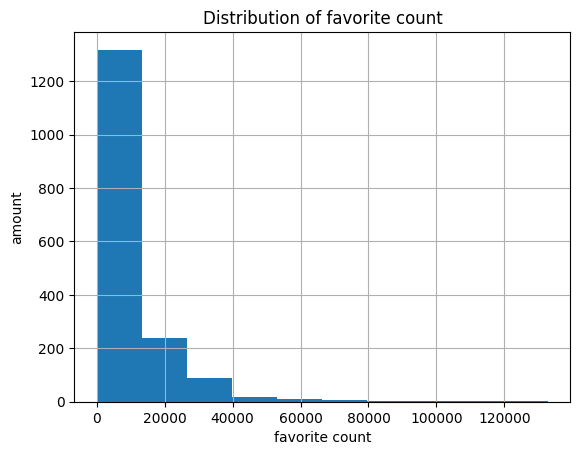

In [51]:
df.favorite_count.hist()
plt.xlabel('favorite count')
plt.ylabel('amount')
plt.title('Distribution of favorite count')
plt.show()

See that, after 40000 favorite counts, the amount of these tweets is little. So I choose 40000 favorite counts is the max limitation of statistics

In [52]:
df.groupby(pd.cut(df["favorite_count"], np.arange(0, 40000, 1000))).agg({'rating_ratio': 'mean'})

,rating_ratio
favorite_count,
"(0, 1000]",0.937073
"(1000, 2000]",1.002874
"(2000, 3000]",1.023182
"(3000, 4000]",1.041622
"(4000, 5000]",1.046364
"(5000, 6000]",1.077104
"(6000, 7000]",1.113208
"(7000, 8000]",1.112534
"(8000, 9000]",1.144444


3. The hour posts tweet that more favorite count

In [53]:
# convert timestamp datatype
df['timestamp'] = pd.to_datetime(df['timestamp'],format= '%Y-%m-%d %H:%M:%S')

In [54]:
df.groupby(pd.cut(df["timestamp"].dt.hour, np.arange(0, 24))).agg({'rating_ratio': 'mean'})

,rating_ratio
timestamp,
"(0, 1]",1.077119
"(1, 2]",1.034024
"(2, 3]",1.010791
"(3, 4]",1.022368
"(4, 5]",0.994444
"(5, 6]",1.200000
"(6, 7]",NaN
"(7, 8]",NaN
"(8, 9]",NaN


In [55]:
df.groupby(pd.cut(df["timestamp"].dt.hour, np.arange(0, 24))).agg({'rating_ratio': 'mean'}).sort_values(by='rating_ratio', ascending=False)

,rating_ratio
timestamp,
"(5, 6]",1.200000
"(13, 14]",1.150000
"(15, 16]",1.140802
"(16, 17]",1.136111
"(21, 22]",1.129091
"(22, 23]",1.108371
"(18, 19]",1.082353
"(0, 1]",1.077119
"(17, 18]",1.073171


### Visualization

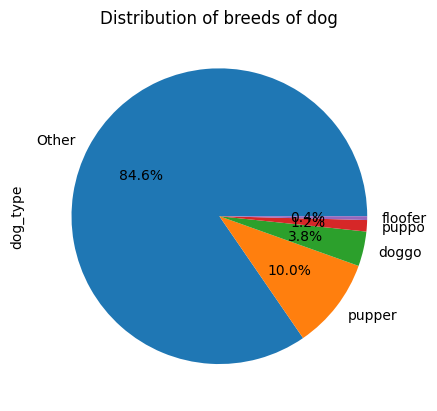

In [56]:
df.dog_type.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of breeds of dog')
plt.show()

The chart shows that the breeds of dog is mainly is Other, and pupper (10%), doggo (3.8%), puppo (0.96%) and floofer (0.32%)

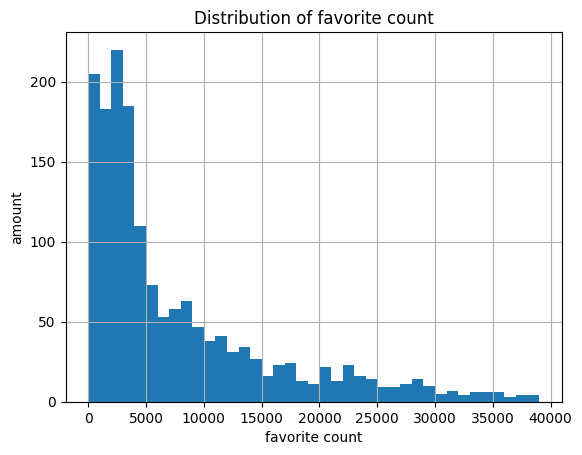

In [57]:
df.favorite_count.hist(bins=np.arange(0, 40000, 1000))
plt.xlabel('favorite count')
plt.ylabel('amount')
plt.title('Distribution of favorite count')
plt.show()

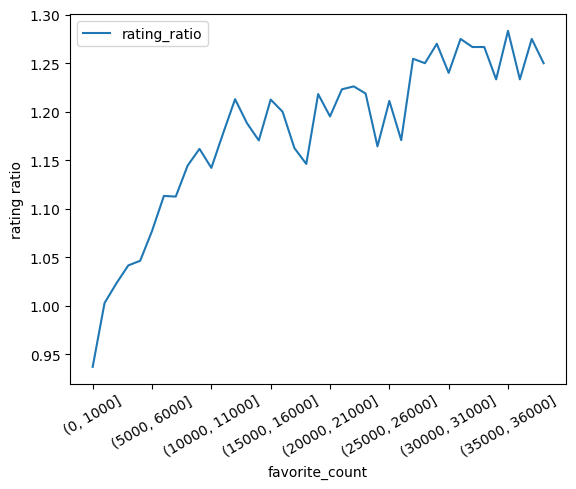

In [58]:
df.groupby(pd.cut(df["favorite_count"], np.arange(0, 40000, 1000))).agg({'rating_ratio': 'mean'}).plot.line()
plt.ylabel('rating ratio')
plt.xticks(rotation=30)
plt.show()

The chart shows that, the more favorite count, the more rating ratio. With tweets have favorite count less than 1000, the average rating ratio is 0.95. In another hand, the tweets have favorite count greater than 30000, the averate rating ratio is approximately 1.25

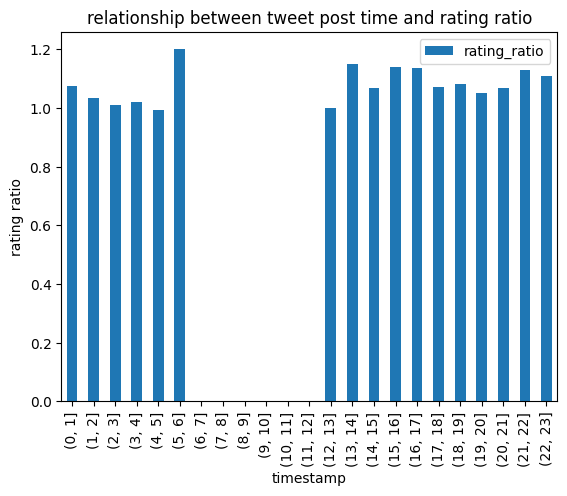

In [59]:
df.groupby(pd.cut(df["timestamp"].dt.hour, np.arange(0, 24))).agg({'rating_ratio': 'mean'}).plot.bar()
plt.ylabel('rating ratio')
plt.title('relationship between tweet post time and rating ratio')
plt.show()

The chart shows that the time you should post the tweet to has more rating ratio is 5am to 6am.